##### Loading the dataset

In [ ]:
import os, shutil, pathlib

original_dir = pathlib.Path("Data/train")
new_base_dir = pathlib.Path("Data/kaggle_dogs_vs_cats_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

##### EDA: Explore the data with relevant graphs, statistics and insights 

##### importing the required libraries

In [45]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pathlib
import matplotlib.image as mpimg

In [46]:
data_folder = pathlib.Path('Data/kaggle_dogs_vs_cats_small')

##### Random numbers

In [47]:
random_numbers = np.random.normal(size=(1000, 16))

In [48]:
print(type(random_numbers))
print(random_numbers.shape)
print(random_numbers.dtype)
print(random_numbers[:4])

<class 'numpy.ndarray'>
(1000, 16)
float64
[[ 1.25892592e+00 -1.96489670e+00 -9.57418274e-01  5.27717915e-01
   1.60911085e+00 -3.87166047e-01  9.72626178e-03 -1.09983089e+00
   1.39181011e+00  8.15299661e-01  7.66788910e-01  3.08689290e-01
   1.14422275e+00 -2.74968085e-01 -3.89572709e-01  1.28385768e-01]
 [-1.23706112e+00  1.62144555e+00 -9.78416822e-01 -4.34544469e-01
  -8.70461629e-02  1.74211805e+00 -1.16906954e+00  7.24617374e-02
  -6.11673760e-02  7.25263509e-01  2.16137010e-01  7.31767798e-01
  -1.77735899e+00 -2.31060380e-01  1.76962197e+00 -2.16591684e+00]
 [ 1.76991382e-01 -1.13671172e-01 -4.36605608e-01 -2.35999203e+00
   1.65206811e+00  2.28154847e+00  1.97212669e-03 -5.09218527e-01
   7.04765438e-02 -6.95408646e-01  2.00723004e-01 -1.58401849e+00
  -2.00894283e-01  6.50058606e-01 -2.17299114e-01 -3.79179541e-01]
 [ 5.41216940e-01  4.99851447e-02  1.01461671e-01 -6.03560064e-01
  -1.30882717e+00 -1.16469363e+00 -8.77317300e-01 -1.99994853e+00
  -1.19470085e+00 -1.13993123e

In [49]:
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [50]:
type(dataset)

tensorflow.python.data.ops.from_tensor_slices_op._TensorSliceDataset

In [51]:
for i, d in enumerate(['A','B','C']):
    print(i,d)

0 A
1 B
2 C


In [52]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


In [53]:
for i, element in enumerate(dataset):
    print(element)
    if i >= 2:
        break

tf.Tensor(
[ 1.25892592 -1.9648967  -0.95741827  0.52771791  1.60911085 -0.38716605
  0.00972626 -1.09983089  1.39181011  0.81529966  0.76678891  0.30868929
  1.14422275 -0.27496809 -0.38957271  0.12838577], shape=(16,), dtype=float64)
tf.Tensor(
[-1.23706112  1.62144555 -0.97841682 -0.43454447 -0.08704616  1.74211805
 -1.16906954  0.07246174 -0.06116738  0.72526351  0.21613701  0.7317678
 -1.77735899 -0.23106038  1.76962197 -2.16591684], shape=(16,), dtype=float64)
tf.Tensor(
[ 1.76991382e-01 -1.13671172e-01 -4.36605608e-01 -2.35999203e+00
  1.65206811e+00  2.28154847e+00  1.97212669e-03 -5.09218527e-01
  7.04765438e-02 -6.95408646e-01  2.00723004e-01 -1.58401849e+00
 -2.00894283e-01  6.50058606e-01 -2.17299114e-01 -3.79179541e-01], shape=(16,), dtype=float64)


In [54]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


In [55]:
type(batched_dataset)

tensorflow.python.data.ops.batch_op._BatchDataset

##### Using Keras Utility Functions to Create a Dataset for Images


In [56]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    data_folder / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    data_folder / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    data_folder / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


#### Train dataset

In [57]:
type(train_dataset)

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

##### Displaying the shapes of the data and labels 

In [58]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


In [59]:
labels_batch


<tf.Tensor: shape=(32,), dtype=int32, numpy=
array([0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0], dtype=int32)>

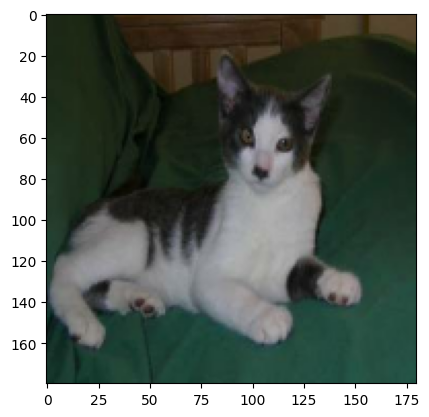

In [60]:
# import imshow
import matplotlib.pyplot as plt

plt.imshow(data_batch[0].numpy().astype("uint8"))

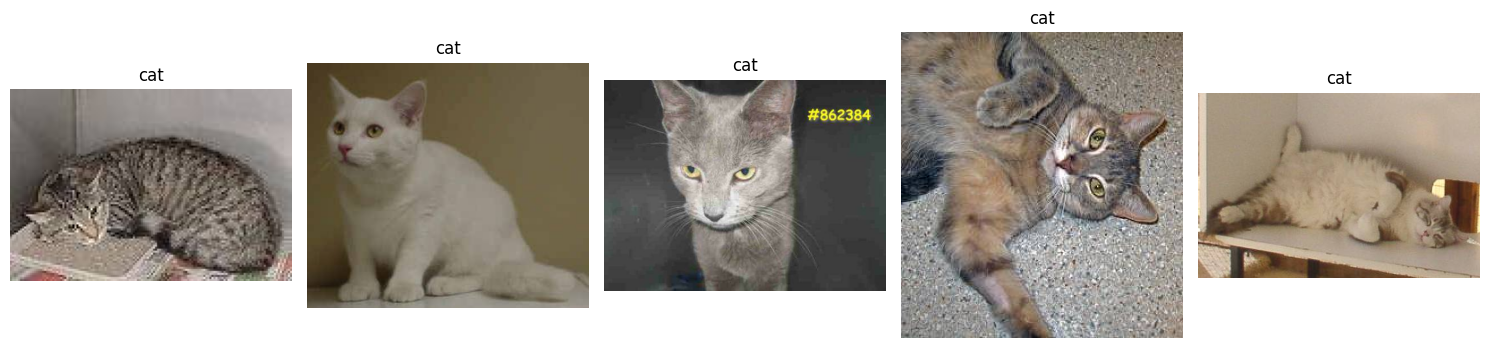

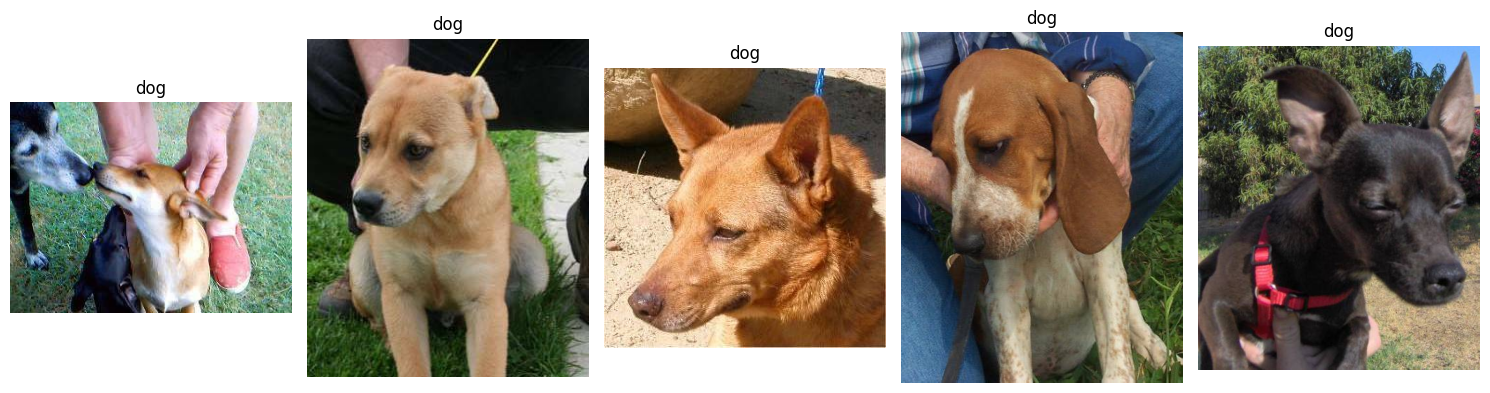

In [61]:
import random
import matplotlib.image as mpimg
# Preview random 5 images from each class in train set
def plot_sample_images(directory, label, n=5):
    path = os.path.join(directory, label)
    images = random.sample(os.listdir(path), n)
    fig, axes = plt.subplots(1, n, figsize=(15,5))
    for img_name, ax in zip(images, axes):
        img_path = os.path.join(path, img_name)
        img = mpimg.imread(img_path)
        ax.imshow(img)
        ax.set_title(label)
        ax.axis('off')
    plt.tight_layout()

plot_sample_images('Data/kaggle_dogs_vs_cats_small/train','cat')
plot_sample_images('Data/kaggle_dogs_vs_cats_small/train','dog')

##### Training the CNN for a real-world image classification

##### Generating the Data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    r'Data\kaggle_dogs_vs_cats_small\train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

val_gen = val_datagen.flow_from_directory(
    r'Data\kaggle_dogs_vs_cats_small\validation',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


##### Defining the CNN

In [ ]:
model_cnn = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # binary classification
])

model_cnn.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

model_cnn.summary()


##### Callbacks and Training the model

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="cnn_best_model.keras",
        save_best_only=True,
        monitor="val_loss"
    ),
]

history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)


##### Doing the VGG16 and using it as Base

In [62]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step


In [63]:
data_folder = pathlib.Path('Data/kaggle_dogs_vs_cats_small')

train_dataset = image_dataset_from_directory(
    data_folder / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    data_folder / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    data_folder / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [65]:
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2)
])

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
vgg_model = keras.Model(inputs, outputs)
vgg_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
vgg_model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 180, 180,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_1        │ (None, 180, 180,  │          0 │ input_layer_3[0]… │
│ (Sequential)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item (GetItem)  │ (None, 180, 180)  │          0 │ sequential_1[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_1          │ (None, 180, 180)  │          0 │ sequential_1[0][… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_2          │ (None, 180, 180)  │          0 │ sequential_1[0][… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stack (Stack)       │ (None, 180, 180,  │          0 │ get_item[0][0],   │
│                     │ 3)                │            │ get_item_1[0][0], │
│                     │                   │            │ get_item_2[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 180, 180,  │          0 │ stack[0][0]       │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ vgg16 (Functional)  │ (None, 5, 5, 512) │ 14,714,688 │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 12800)     │          0 │ vgg16[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 256)       │  3,277,056 │ flatten_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 256)       │          0 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 1)         │        257 │ dropout[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 17,992,001 (68.63 MB)

 Trainable params: 17,992,001 (68.63 MB)

 Non-trainable params: 0 (0.00 B)

In [64]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 

In [66]:
callbacks_ft = [
    keras.callbacks.ModelCheckpoint(
        filepath="vgg16_finetune_best.keras",
        save_best_only=True,
        monitor="val_loss"
    ),
    keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
]

history_vgg = vgg_model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks_ft
)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1095s 17s/step - accuracy: 0.5065 - loss: 5.0873 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1042s 17s/step - accuracy: 0.5000 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1086s 17s/step - accuracy: 0.5000 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1072s 17s/step - accuracy: 0.4970 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1025s 16s/step - accuracy: 0.5030 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1021s 16s/step - accuracy: 0.5040 - loss: 0.6932 - val_accuracy: 0.4990 - val_loss: 0.6931
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1022s 16s/step - accuracy: 0.5200 - loss: 1.5511 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1020s 16s/step - accuracy: 0.4955 - loss: 0.6932 - val_accu

##### Fine tuning the layers

In [67]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

vgg_model.compile(loss="binary_crossentropy", optimizer=keras.optimizers.Adam(1e-5), metrics=["accuracy"])

# Continue training for a few epochs to fine-tune
history_fine = vgg_model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=callbacks_ft
)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 390s 6s/step - accuracy: 0.5030 - loss: 0.6930 - val_accuracy: 0.4990 - val_loss: 0.6931
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 377s 6s/step - accuracy: 0.4925 - loss: 0.6931 - val_accuracy: 0.4990 - val_loss: 0.6931
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 369s 6s/step - accuracy: 0.5165 - loss: 0.6927 - val_accuracy: 0.5000 - val_loss: 0.6928
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 368s 6s/step - accuracy: 0.5175 - loss: 0.6909 - val_accuracy: 0.5110 - val_loss: 0.6933
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 382s 6s/step - accuracy: 0.5145 - loss: 0.6904 - val_accuracy: 0.5020 - val_loss: 0.6892
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 420s 7s/step - accuracy: 0.5195 - loss: 0.6892 - val_accuracy: 0.5030 - val_loss: 0.6870
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 393s 6s/step - accuracy: 0.5050 - loss: 0.6891 - val_accuracy: 0.5070 - val_loss: 0.6854
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 372s 6s/step - accuracy: 0.5245 - loss: 0.6872 - val_accuracy: 0.5030 - v